In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpg8k3kje5GP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Fluorescent_Neuronal_Cells/Fluorescent_Neuronal_Cells.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Fluorescent_Neuronal_Cells/Fluorescent_Neuronal_Cells_masks.npy')

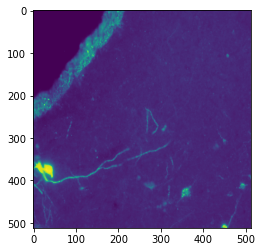

In [5]:
plt.imshow(images[1])

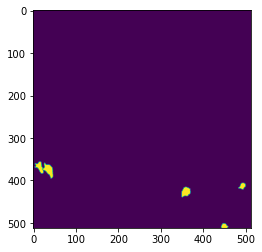

In [6]:
plt.imshow(masks[1])

In [7]:
len(images)

283

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=293, weights=weights)

Weights OK!


In [10]:
RUNS = 2

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
1/1 [==============================] - 103s 103s/step - loss: -3638.8313 - dice_coeff: 1.8780 - val_loss: -552.7778 - val_dice_coeff: 1.6282
Epoch 2/100
1/1 [==============================] - 98s 98s/step - loss: -5428.2461 - dice_coeff: 1.9400 - val_loss: -555.4780 - val_dice_coeff: 1.6327
Epoch 3/100
1/1 [==============================] - 98s 98s/step - loss: -6633.2319 - dice_coeff: 1.9615 - val_loss: -548.3085 - val_dice_coeff: 1.6298
Epoch 4/100
1/1 [==============================] - 98s 98s/step - loss: -7354.6274 - dice_coeff: 1.9735 - val_loss: -538.5613 - val_dice_coeff: 1.6249
Epoch 5/100
1/1 [==============================] - 99s 99s/step - loss: -7205.5220 - dice_coeff: 1.9670 - val_loss: -547.3724 - val_dice_coeff: 1.6315
Epoch 6/100
1/1 [==============================] - 98s 98s/step - loss: -7803.4365 - dice_coeff: 1.9744 - val_loss: -542.4208 - val_dice_coeff: 1.6288
Epoch 7/100
1/1 [==============================] - 98s 98s/step - loss: -8531.995

In [ ]:
R.classifier_scores

In [13]:
R.discriminator_scores

[[2.678362989172456e-07, 1.0],
 [8.387606620788574, 0.5021276473999023],
 [11.207149505615234, 0.5234042406082153],
 [13.867310523986816, 0.5191489458084106],
 [14.44869613647461, 0.5446808338165283]]

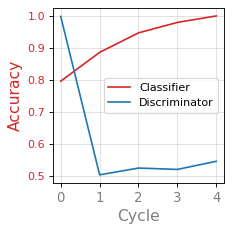

In [14]:
R.plot()